In [1]:
from PIL import Image
import numpy as np
image = Image.open('image.png')

In [2]:
img = np.asarray(image)

In [3]:
import matplotlib.pyplot as plt
img_ = np.mean(img,axis=-1)
U, D, VT = np.linalg.svd(img_/255)

In [4]:
def transform(img_):
    f = np.fft.fft2(img_)
    f_shift = np.fft.fftshift(f)
    f_complex = f_shift
    f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
    f_bounded = 20 * np.log(f_abs)
    return f_bounded

Text(0, 0.5, 'Abs value of the eigenvalue')

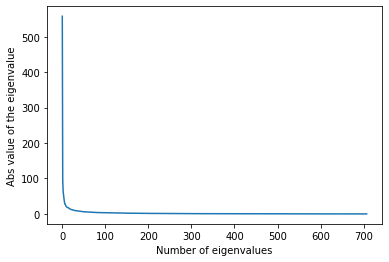

In [11]:
plt.plot(D)
plt.xlabel("Number of eigenvalues")
plt.ylabel("Abs value of the eigenvalue")

In [5]:
images = []
image_ = np.zeros_like(img_)
images_fft = []
D_true = np.zeros_like(img_)
lmax = 0
for i in range(len(D)):
    image_ += np.outer(U[:,i],VT[i,:])*D[i]
    image_fft = transform(image_)
    # images.append(np.copy(image_))
    images_fft.append(np.copy(image_fft))
    l = np.max(image_fft)
    if type(lmax) ==int:
        print("Ok")
        lmax = l
    if l>lmax:
        lmax = l

Ok


In [6]:
images_PIL = [Image.fromarray((x*255).astype(np.uint8),mode='P') for x in images]

In [7]:
images_PIL[0].save('animated.gif',
               save_all = True, append_images = images_PIL[1:],
               optimize = False, duration = 60)

In [8]:
images_fft_PIL = [Image.fromarray((x*255/lmax).astype(np.uint8),mode='P') for x in images_fft]

In [12]:
images_fft_PIL[0].save('animated_fft.gif',
               save_all = True, append_images = images_fft_PIL[1:],
               optimize = True, duration = 60)


In [15]:
i = 0
plt.imsave("initial.png",np.outer(U[:,i],VT[i,:])*D[i], cmap="gray")

animated_fft.gif  animated.gif  image.png  initial.png  sample_data/
